# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** Alif Adhitya
- **Email:** alifadhitya13@gmail.com
- **ID Dicoding:** rnkfry

## Menentukan Pertanyaan Bisnis

- Bagaimana presentase perbandingan peminjaman sepeda pada hari weekend dan weekdays? 
- Bagaimana perbandingan tiap tiap musim terhadap peminjaman sepeda baik di hari weekend mapun hari weekdays?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
data = pd.read_csv("data/day.csv")

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset telah disediakan oleh dicoding dalam bentuk zip sehingga perlu untuk mengekstrak dan memindahkan file ini ke dalam satu folder dengan file ipynb (file projek)
- Dataset dipanggil menggukana library pandas dan dikarenakan format nya csv maka disini saya menggunakan function read_csv dan disimpan dalam dataframe 'data'
- Saya memanggil dataset dengan function head() agar hanya menampilkan 5 baris pertama


### Assessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
total_unique_values = data['instant'].nunique()

print("Total nilai unik dalam kolom instant :", total_unique_values)

Total nilai unik dalam kolom instant : 731


In [6]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
tot_duplc = data.duplicated().sum()

print("Jumlah data yang duplikasi :", tot_duplc)

Jumlah data yang duplikasi : 0


In [8]:
unique_values_season = data['season'].unique()

print("Nilai unik dalam kolom 'season':")
print(unique_values_season )

value_counts_season = data['season'].value_counts()
print("Jumlah kemunculan masing-masing nilai :")
print(value_counts_season)

Nilai unik dalam kolom 'season':
[1 2 3 4]
Jumlah kemunculan masing-masing nilai :
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


In [9]:
unique_values_weekday = data['weekday'].unique()

print("Nilai unik dalam kolom 'weekday':")
print(unique_values_weekday)

value_counts_weekday = data['weekday'].value_counts()
print("Jumlah kemunculan masing-masing nilai :")
print(value_counts_weekday)

Nilai unik dalam kolom 'weekday':
[6 0 1 2 3 4 5]
Jumlah kemunculan masing-masing nilai :
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64


In [10]:
unique_values = data['workingday'].unique()

print("Nilai unik dalam kolom 'workingday':")
print(unique_values)

value_counts = data['workingday'].value_counts()
print("Jumlah kemunculan masing-masing nilai :")
print(value_counts)

Nilai unik dalam kolom 'workingday':
[0 1]
Jumlah kemunculan masing-masing nilai :
workingday
1    500
0    231
Name: count, dtype: int64


**Insight:**
- Dataset memiliki total 731 records dan 16 kolom yang terdiri dari 11 kolom integer, 4 kolom float, dan 1 kolom object
- Dataset tidak memiliki missing value / NaN
- Dataset juga tidak memiliki duplicated value

### Cleaning Data

**Insight:**
- Data yang didapatkan sudah cukup bersih untuk menjawab pertanyaan di atas menimbang tidak ada missing value dan duplicate. 

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Berdasarkan function describe, berikut beberapa insight yang ditemukan**
- Rata rata peminjaman dilakukan pada season 2 (summer)
- Rata rata peminjaman dilakukan pada non - holiday (berdasarkan kolom holiday, mean nya adalah 0,16)
- Rata rata peminjaman dilakukan pada hari ke-3 (berdasarkan mean kolom weekday, yaitu 2.997)
- Rata rata peminjaman perhari adalah 4.504 pinjaman dengan jumlah pinjaman paling kecil yaitu 22 dan pinjaman paling besar 8.174 pinjaman

<AxesSubplot:>

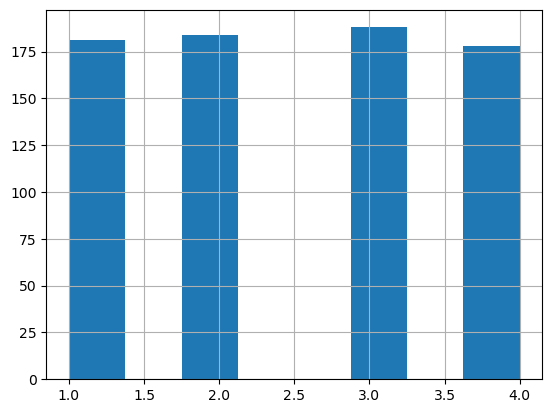

In [12]:
data['season'].hist(bins=8) 

Rata - rata penggunaan sepeda cukup sama di tiap tiap musim

<AxesSubplot:>

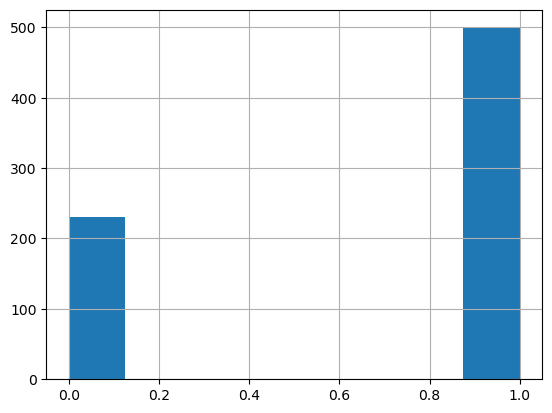

In [13]:
data['workingday'].hist(bins=8) 

Peminjaman sepeda lebih sering terjadi di hari kerja

In [14]:
data_season1 = data[data['season'] == 1]

data_season1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,181.000000,181.0,181.000000,181.000000,181.000000,181.00000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,262.685083,1.0,0.502762,3.093923,0.038674,3.00000,0.662983,1.408840,0.297748,0.296914,0.582903,0.214537,334.928177,2269.204420,2604.132597
std,212.113584,0.0,0.501379,3.403759,0.193352,2.03306,0.474002,0.536169,0.102735,0.099026,0.151880,0.086439,387.655561,1200.269751,1399.942119
min,1.000000,1.0,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.059130,0.079070,0.000000,0.045408,9.000000,416.000000,431.000000
25%,46.000000,1.0,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.222500,0.232333,0.483333,0.155091,109.000000,1379.000000,1538.000000
50%,366.000000,1.0,1.000000,2.000000,0.000000,3.00000,1.000000,1.000000,0.285833,0.282821,0.544167,0.202750,218.000000,1867.000000,2209.000000
75%,411.000000,1.0,1.000000,3.000000,0.000000,5.00000,1.000000,2.000000,0.361739,0.359670,0.696087,0.253112,424.000000,3162.000000,3456.000000
max,731.000000,1.0,1.000000,12.000000,1.000000,6.00000,1.000000,3.000000,0.572500,0.548617,0.948261,0.507463,3155.000000,5315.000000,7836.000000


In [15]:
data_season2 = data[data['season'] == 2]

data_season2.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,184.000000,184.0,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,308.500000,2.0,0.500000,4.652174,0.021739,2.98913,0.695652,1.402174,0.544405,0.520307,0.626948,0.203507,1106.097826,3886.233696,4992.331522
std,185.421422,0.0,0.501364,0.951671,0.146228,1.99997,0.461386,0.523957,0.122650,0.108022,0.152841,0.071629,737.590829,1353.375628,1695.977235
min,80.000000,2.0,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.253043,0.250339,0.254167,0.065929,120.000000,674.000000,795.000000
25%,125.750000,2.0,0.000000,4.000000,0.000000,1.00000,0.000000,1.000000,0.458125,0.449642,0.500938,0.147236,650.250000,3012.500000,4003.000000
50%,308.500000,2.0,0.500000,5.000000,0.000000,3.00000,1.000000,1.000000,0.562083,0.538212,0.644375,0.194031,867.000000,3844.000000,4941.500000
75%,491.250000,2.0,1.000000,5.000000,0.000000,5.00000,1.000000,2.000000,0.631667,0.594867,0.741667,0.249377,1463.250000,4927.750000,6377.000000
max,537.000000,2.0,1.000000,6.000000,1.000000,6.00000,1.000000,3.000000,0.808333,0.757579,0.922500,0.388067,3410.000000,6456.000000,8362.000000


In [16]:
data_season3 = data[data['season'] == 3]

data_season3.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,188.00000,188.0,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,401.50000,3.0,0.500000,7.691489,0.021277,3.031915,0.696809,1.297872,0.706309,0.655898,0.633482,0.172095,1202.611702,4441.691489,5644.303191
std,185.49467,0.0,0.501335,0.948137,0.144690,1.994389,0.460865,0.503034,0.070848,0.072056,0.119349,0.059526,595.975032,1304.626949,1459.800381
min,172.00000,3.0,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.469167,0.242400,0.360000,0.064071,118.000000,889.000000,1115.000000
25%,218.75000,3.0,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.667083,0.618540,0.550833,0.131066,781.750000,3477.250000,4586.500000
50%,401.50000,3.0,0.500000,8.000000,0.000000,3.000000,1.000000,1.000000,0.714583,0.656575,0.635000,0.165115,1050.500000,4110.500000,5353.500000
75%,584.25000,3.0,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,0.750208,0.698093,0.712604,0.208957,1424.000000,5667.750000,6929.250000
max,631.00000,3.0,1.000000,9.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.939565,0.375617,3160.000000,6917.000000,8714.000000


In [17]:
data_season4 = data[data['season'] == 4]

data_season4.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,178.000000,178.0,178.00000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,493.000000,4.0,0.50000,10.696629,0.033708,2.966292,0.679775,1.477528,0.422906,0.415539,0.668719,0.171995,729.112360,3999.050562,4728.162921
std,185.315764,0.0,0.50141,0.919402,0.180985,2.008172,0.467879,0.603240,0.107834,0.095536,0.131248,0.081565,606.318118,1444.782557,1699.615261
min,266.000000,4.0,0.00000,9.000000,0.000000,0.000000,0.000000,1.000000,0.220833,0.227913,0.333478,0.022392,2.000000,20.000000,22.000000
25%,310.250000,4.0,0.00000,10.000000,0.000000,1.000000,0.000000,1.000000,0.331250,0.337900,0.570729,0.106350,318.500000,2974.500000,3615.500000
50%,493.000000,4.0,0.50000,11.000000,0.000000,3.000000,1.000000,1.000000,0.409166,0.409394,0.661042,0.166986,544.500000,3815.000000,4634.500000
75%,675.750000,4.0,1.00000,11.000000,0.000000,5.000000,1.000000,2.000000,0.513542,0.503151,0.756875,0.227610,922.000000,5075.500000,5624.500000
max,720.000000,4.0,1.00000,12.000000,1.000000,6.000000,1.000000,3.000000,0.657500,0.607975,0.972500,0.422275,3031.000000,6946.000000,8555.000000


In [18]:
data_workingday0 = data[data['workingday'] == 0]

data_workingday0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,367.346320,2.476190,0.502165,6.549784,0.090909,2.891775,0.0,1.346320,0.481213,0.461852,0.622800,0.192628,1371.134199,2959.034632,4330.168831
std,212.543359,1.129869,0.501081,3.527025,0.288104,2.917931,0.0,0.520428,0.187285,0.167750,0.145050,0.078194,873.064794,1293.867686,2052.141245
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.059130,0.079070,0.187917,0.042304,54.000000,451.000000,605.000000
25%,184.500000,1.000000,0.000000,4.000000,0.000000,0.000000,0.0,1.000000,0.325833,0.325117,0.507228,0.139927,607.500000,2076.000000,2710.500000
50%,366.000000,2.000000,1.000000,7.000000,0.000000,1.000000,0.0,1.000000,0.463333,0.456429,0.615833,0.186562,1338.000000,2928.000000,4459.000000
75%,549.500000,3.000000,1.000000,10.000000,0.000000,6.000000,0.0,2.000000,0.659583,0.613652,0.732708,0.230409,2133.500000,3920.000000,5907.500000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,0.0,3.000000,0.861667,0.804913,0.948261,0.507463,3410.000000,5966.000000,8714.000000


In [19]:
data_workingday1 = data[data['workingday'] == 1]

data_workingday1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,500.000000,500.000000,500.000000,500.00000,500.0,500.000000,500.0,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,365.378000,2.506000,0.500000,6.50600,0.0,3.046000,1.0,1.41800,0.501932,0.480130,0.630248,0.189497,606.570000,3978.250000,4584.820000
std,210.737048,1.102904,0.500501,3.42014,0.0,1.395629,0.0,0.55488,0.180876,0.160542,0.141287,0.077233,391.496032,1568.692453,1878.415583
min,3.000000,1.000000,0.000000,1.00000,0.0,1.000000,1.0,1.00000,0.097391,0.117930,0.000000,0.022392,2.000000,20.000000,22.000000
25%,181.750000,2.000000,0.000000,4.00000,0.0,2.000000,1.0,1.00000,0.344094,0.342094,0.530833,0.134177,251.500000,3107.000000,3344.250000
50%,366.000000,3.000000,0.500000,6.50000,0.0,3.000000,1.0,1.00000,0.514167,0.503144,0.631250,0.176937,616.500000,3866.000000,4582.000000
75%,546.750000,3.000000,1.000000,9.00000,0.0,4.000000,1.0,2.00000,0.654375,0.607015,0.729271,0.234620,872.750000,5183.250000,5987.500000
max,731.000000,4.000000,1.000000,12.00000,0.0,5.000000,1.0,3.00000,0.848333,0.840896,0.972500,0.441563,2469.000000,6946.000000,8362.000000


**Insight:**
- Rata rata peminjaman dilakukan pada diantara dua musim yaitu season 2 (summer) dan 3 (fallls). ini terjadi karena nilai mean nya adalah 2.496
- Rata rata peminjaman dilakukan pada non - holiday (berdasarkan kolom holiday, mean nya adalah 0,16)
- Rata rata peminjaman dilakukan pada hari ke-3 (berdasarkan mean kolom weekday, yaitu 2.997)
- Rata rata peminjaman perhari adalah 4.504 pinjaman dengan jumlah pinjaman paling kecil yaitu 22 dan pinjaman paling besar 8.174 pinjaman
- pada season 1 (spring/semi), rata rata peminjaman perhari nya adalah 2.604 pinjaman
- pada season 2 (summer/panas), rata rata peminjaman perhari nya adalah 4.992 pinjaman
- pada season 3 (falls/gugur), rata rata peminjaman perhari nya adalah 5.644 pinjaman
- pada season 4 (winter/dingin), rata rata peminjaman perhari nya adalah 4.728 pinjaman

## Visualization & Explanatory Analysis

### Pertanyaan 1:

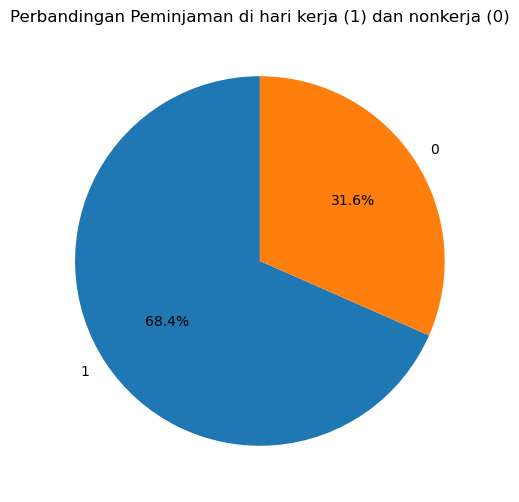

In [25]:
workingday_counts = data['workingday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    workingdays_counts, 
    labels=workingdays_counts.index,
    autopct='%1.1f%%',
    startangle=90)

plt.title('Perbandingan Peminjaman di hari kerja (1) dan nonkerja (0)')
plt.show()

### Pertanyaan 2:

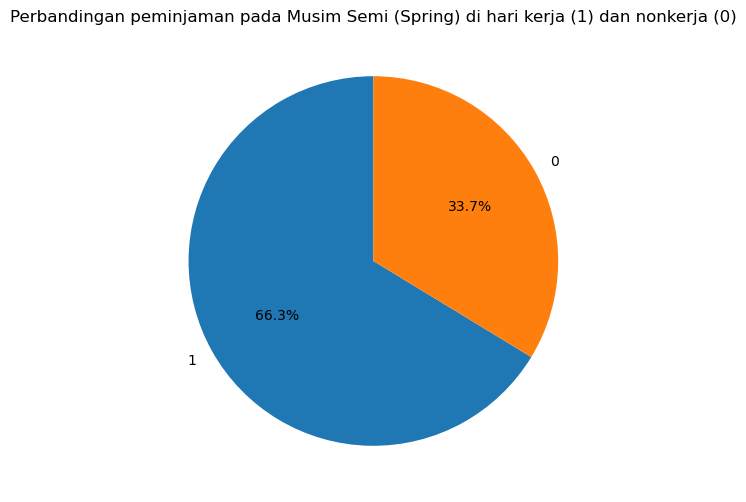

In [26]:
workingday_counts_s1 = data_season1['workingday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(workingday_counts_s1, labels=workingday_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Perbandingan peminjaman pada Musim Semi (Spring) di hari kerja (1) dan nonkerja (0)')
plt.show()

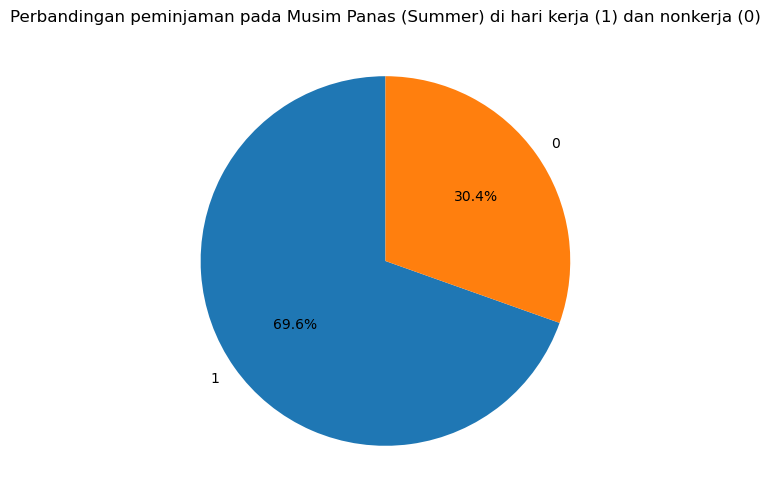

In [27]:
workingday_counts_s2 = data_season2['workingday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(workingday_counts_s2, labels=workingday_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Perbandingan peminjaman pada Musim Panas (Summer) di hari kerja (1) dan nonkerja (0)')
plt.show()

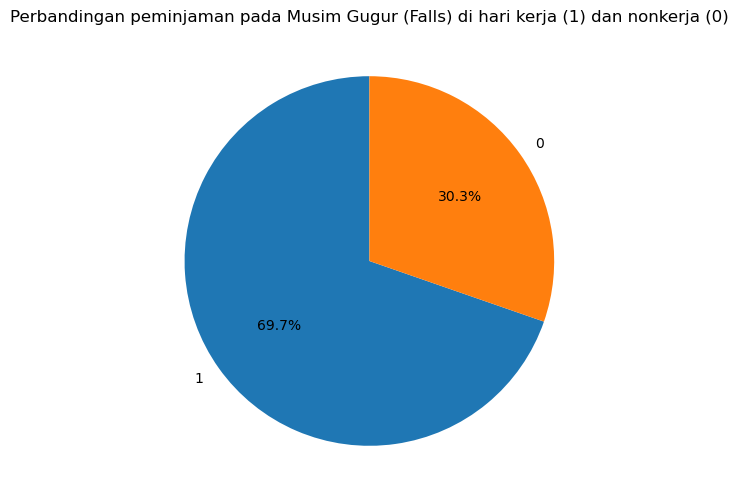

In [28]:
workingday_counts_s3 = data_season3['workingday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(workingday_counts_s3, labels=workingday_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Perbandingan peminjaman pada Musim Gugur (Falls) di hari kerja (1) dan nonkerja (0)')
plt.show()

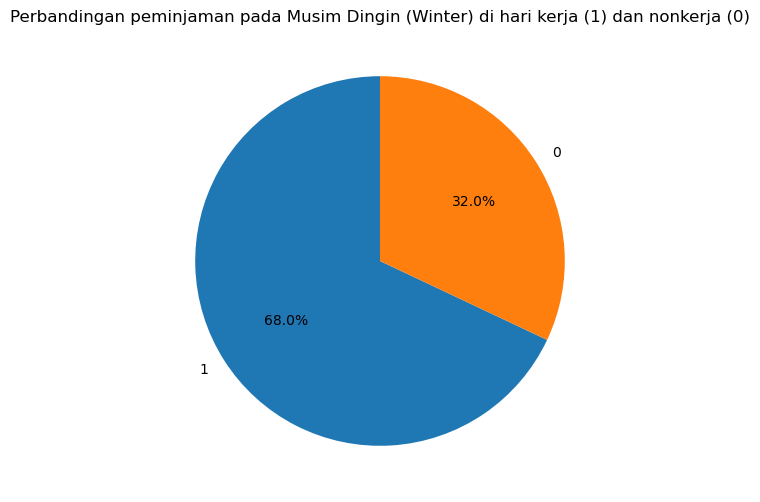

In [29]:
workingday_counts_s4 = data_season4['workingday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(workingday_counts_s4, labels=workingday_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Perbandingan peminjaman pada Musim Dingin (Winter) di hari kerja (1) dan nonkerja (0)')
plt.show()

**Insight:**
- Presentase perbandingan peminjaman sepeda pada hari weekdays (hari kerja) dan weekend (hari libur) secara keseluruhan adalah 68.4% dan 31.6%. 
- Presentase perbandingan peminjaman sepeda pada hari weekdays (hari kerja) dan weekend (hari libur) pada musim semi adalah 66.3% dan 33.7%
- Presentase perbandingan peminjaman sepeda pada hari weekdays (hari kerja) dan weekend (hari libur) pada musim panas adalah 69.6% dan 30.4%
- Presentase perbandingan peminjaman sepeda pada hari weekdays (hari kerja) dan weekend (hari libur) pada musim gugur adalah 69.7% dan 30.3%
- Presentase perbandingan peminjaman sepeda pada hari weekdays (hari kerja) dan weekend (hari libur) pada musim dingin adalah 68% dan 32 %



## Conclusion

- Berdasarkan pie chart yang telah dibuat, secara keseluruhan orang menggunakan sepeda pinjaman ini pada hari kerja ketimbang hari libur
- Perbandingan tiap tiap musim terhadap peminjaman sepeda baik di hari weekend mapun hari weekdays terlihat sama. Baik pada musim panas, semi, gugur, atau dingin. Peminjaman sepeda lebih sering terjadi pada hari kerja.

2 Kesimpulan di atas mengindikasikan bahwa perusahaan dapat memfokuskan penawaran menarik di hari kerja agar keuntungan bisa didapat lebih